In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
from flowFieldWavy import *
from flowFieldArray import *
from pseudo import *
from laminar import *
import time
import os
import matplotlib.pyplot as plt
%matplotlib inline

figureFolder = '/home/sabarish/Dropbox/reports/2016/JFM/figures/'




In [ ]:
J0, F0, fnorm0 = makeSystem(vf=vf,pf=pf,resNorm=True,rect=False)
J1,F1,fnorm1 = makeSystem(vf=vf,pf=pf, resNorm=True,rect=True)
norm=np.linalg.norm

In [ ]:
fnorm0-fnorm1

In [ ]:
N = flowDict['N']; N4 = 4*N; m = vf.nx
#BCrows = N4*np.arange(m).reshape((m,1)) + np.array([0,N-1,N,2*N-1,2*N,3*N-1]).reshape((1,6))
#BCrows = N4*(m//2)+ np.array([0,N-1,N,2*N-1,2*N,3*N-1]).reshape((1,6))
BCrows = N4*np.array([0,m-1]).reshape((2,1)) + np.array([0,N-1,N,2*N-1]).reshape((1,4))
BCrows = BCrows.flatten()
#BCrows = np.append(BCrows,np.array([F1.size-1]))

In [ ]:
F10 = np.delete(F1,BCrows)
#F0.shape, F10.shape, norm(F0-F10)

In [ ]:
J10 = np.delete(J1,BCrows,axis=0)
#J0.shape,J10.shape, norm((J0-J10).flatten())

In [ ]:
dx0,linRes0,r0,s0 = np.linalg.lstsq(J0,-F0,rcond=1.0e-9)
dx1,linRes1,r1,s1 = np.linalg.lstsq(J1,-F1,rcond=1.0e-9)
dx10,linRes10,r10,s10 = np.linalg.lstsq(J10,-F10,rcond=1.0e-9)

In [ ]:
print(linRes0,linRes1,linRes10, r0,r1,r10 )
s0[-3:],s1[-3:],s10[-3:], norm(dx0),norm(dx1), norm(dx10), norm(dx0-dx1), norm(dx0-dx10)

In [ ]:
norm((np.dot(J0,dx0)+F0)), norm((np.dot(J1,dx1)+F1)), norm((np.dot(J10,dx10)+F10))

In [ ]:
linResArr1 = (np.dot(J1,dx1)+F1)

In [ ]:
nonZero = np.arange(F1.size)[np.abs(linResArr1)>5.0e-14]

In [ ]:
dx0t = dx0.reshape(vf.nx,4,vf.N)
#dx0t[vf.nx//2,3] = 0.
dx10t = dx10.reshape(vf.nx,4,vf.N)
#dx10t[vf.nx//2,3] = 0.
#norm(dx0t.flatten()-dx10t.flatten())
norm(dx0t[vf.nx//2,3]-dx10t[vf.nx//2,3])

In [ ]:
flowDict = getDefaultDict()
flowDict.update({'eps':0.05,'alpha':20.,'beta':0.,'Re':100.,'L':8,'M':0,'N':50,'nd':4, 'isPois':1})

In [ ]:
gArr = 0.5*np.arange(0.125,3.125,0.125)
vf = dict2ff(flowDict)
pf = vf.getScalar().zero()
start = time.time()
for g in gArr:
    start1 = time.time()
    a = g/flowDict['eps']
    vf.flowDict = updateDict(vf.flowDict,{'alpha':a})
    pf.flowDict = updateDict(pf.flowDict,{'alpha':a})
    vf,pf,fnormArr,flg = iterate(vf=vf, pf=pf,rect=False)
    saveff(vf,pf)
    print('g:',g, ' runtime:', time.time()-start1, ',  total time elapsed:',time.time()-start)
    print('**********************************************************')

In [ ]:
tempDict = updateDict(flowDict.copy(),{'Re':100.})
start = time.time()
for g in gArr[-3:]:
    start1 = time.time()
    a = g/flowDict['eps']
    tempDict.update({'alpha':a})
    vf,pf = loadff(dict2name(tempDict))
    vf.flowDict.update({'Re':10.}); pf.flowDict.update({'Re':10.})
    vf,pf,fnormArr,flg = iterate(vf=vf, pf=pf,rect=False,tol=1.0e-13)
    saveff(vf,pf)
    print('runtime:', int(time.time()-start1), ',  total time elapsed:',int(time.time()-start))

In [ ]:
gArr

In [ ]:
flowDict = getDefaultDict()
Re = 10.
flowDict.update({'eps':0.05,'alpha':20.,'beta':0.,'Re':Re,'L':8,'M':0,'N':50,'nd':4, 'isPois':1})

epsArr = np.arange(0.025,0.0,-0.005)
gArr = np.arange(0.05,1.55,0.05)


flowDict.update({'eps':float(epsArr[0]),'alpha':float(gArr[0]/epsArr[0])})
vf = dict2ff(flowDict)
pf = vf.getScalar().zero()
start = time.time()
for k in range(epsArr.size):
    eps = epsArr[k]
    flowDict.update({'eps':float(eps)})
    if k!=0:
        vf = vfG0;  pf = pfG0
    for g in gArr:
        a = float(g)/flowDict['eps']
        flowDict.update({'alpha':a})
        
        vf.flowDict=updateDict(flowDict,{'nd':3}); pf.flowDict = updateDict(flowDict,{'nd':1})
        start1 = time.time()
        print('eps:',eps,', g:',g, ', Re:',Re)
        if g > gArr[0]:
            vf[:] = vf[:] + dvf[:]; pf[:] = pf[:] + dpf[:]
        else:
            vfG0 = vf.copy(); pfG0 = pf.copy()
        
        vf0 = vf.copy(); pf0 = pf.copy()
        vf,pf,fnormArr,flg = iterate(vf=vf0, pf=pf0,rect=False,tol=1.0e-13)
        dvf = vf - vf0; dpf = pf - pf0
        
        saveff(vf,pf)
        print('Runtime:', int(time.time()-start1), ',  total time elapsed:',int(time.time()-start))
        print('**************************************')

In [ ]:
flowDict = getDefaultDict()
Re = 100.
flowDict.update({'eps':0.05,'alpha':20.,'beta':0.,'Re':Re,'L':8,'M':0,'N':50,'nd':4, 'isPois':1})

epsArr = np.arange(0.005,0.102,0.005)
gArr = np.arange(0.05,1.55,0.05)

flowDict.update({'eps':np.float(epsArr[0]),'alpha':np.float(gArr[0]/epsArr[0])})
vf = dict2ff(flowDict)
pf = vf.getScalar().zero()
start = time.time()
for k in range(epsArr.size):
    eps = epsArr[k]
    flowDict.update({'eps':np.float(eps)})
    if k!=0:
        vf = vfG0;  pf = pfG0
    for g in gArr:
        a = g/flowDict['eps']
        flowDict.update({'alpha':np.float(a)})
        
        vf.flowDict=updateDict(flowDict,{'nd':3}); pf.flowDict = updateDict(flowDict,{'nd':1})
        start1 = time.time()
        print('eps:',eps,', g:',g, ', Re:',Re)
        if g > gArr[0]:
            vf[:] = vf[:] + dvf[:]; pf[:] = pf[:] + dpf[:]
        else:
            vfG0 = vf.copy(); pfG0 = pf.copy()
        
        vf0 = vf.copy(); pf0 = pf.copy()
        vf,pf,fnormArr,flg = iterate(vf=vf0, pf=pf0,rect=False,tol=1.0e-13)
        dvf = vf - vf0; dpf = pf - pf0
        
        saveff(vf,pf)
        print('Runtime:', int(time.time()-start1), ',  total time elapsed:',int(time.time()-start))
        print('**************************************')

In [ ]:
flowDict = getDefaultDict()
Re = 0.1
flowDict.update({'eps':0.005,'alpha':1.,'beta':0.,'Re':Re,'L':5,'M':0,'N':30,'nd':4, 'isPois':1})

savePath = 'solutions/Re0p1/'
epsArr = np.arange(0.005,0.102,0.005)
gArr = np.arange(0.001,0.02,0.001)

flowDict.update({'eps':np.float(epsArr[0]),'alpha':np.float(gArr[0]/epsArr[0])})
vf = dict2ff(flowDict)
pf = vf.getScalar().zero()
start = time.time()
for k in range(epsArr.size):
    eps = round(epsArr[k],4)
    vf.flowDict.update({'eps':np.float(eps)})
    pf.flowDict.update({'eps':np.float(eps)})
    for g in gArr:
        a = round(g,3)/round(vf.flowDict['eps'],4)
        vf.flowDict.update({'alpha':np.float(a)})
        pf.flowDict.update({'alpha':np.float(a)})
        
        start1 = time.time()
        print('eps:',eps,', gx:',g, ', Re:',Re)
        vf,pf,fnormArr,flg = iterate(vf=vf, pf=pf,rect=False,tol=1.0e-12)
        
        saveff(vf,pf,prefix=savePath)
        print('Runtime:', int(time.time()-start1), ',  total time elapsed:',int(time.time()-start))
        print('**************************************')

In [ ]:
%debug

In [ ]:
flowDict = getDefaultDict()
Re = 10.
flowDict.update({'eps':0.005,'alpha':20.,'beta':0.,'Re':Re,'L':8,'M':0,'N':50,'nd':4, 'isPois':1})
g = 0.1; flowDict.update({'alpha':float(0.005/g)})
vf,pf = loadff(dict2name(flowDict))

In [ ]:
epsArr = np.arange(0.075,0.05,-0.005)

start = time.time()
for k in range(2):
    eps = epsArr[k]
    flowDict.update({'eps':eps})
    print('%04d' %(int(eps*1.0e04)), flowDict['eps'], type(flowDict['eps']))

In [ ]:
import os 
files= [f for f in os.listdir('./solutions/Re1000/')]
files.sort()
loadPath = 'solutions/Re1000/'

In [ ]:
epsArr = np.zeros((20,30)).flatten()
gArr = epsArr.copy()
k = 0
for f in files:
    vf,pf = loadff(loadPath+f)
    res = vf.slice(L=10).residuals(pField=pf.slice(L=10))
    resNorm = res.slice(L=8).norm()
    eps = vf.flowDict['eps']
    a = vf.flowDict['alpha']
    g = eps*a
    epsArr[k] = eps
    gArr[k] = g
    k+= 1
    
epsArr = epsArr.reshape((20,30))
gArr= gArr.reshape((20,30))

print( np.sum(np.abs(epsArr[:,0:1]-epsArr[:,1:]).flatten()), np.sum(np.abs(gArr[0:1]-gArr[1:])).flatten())


In [ ]:
epsArr[0], epsArr[5],gArr[0], gArr[5]

In [ ]:
savePath = 'solutions/Re1000/'
start = time.time()
for f in files[-180:]:
    start1 = time.time()
    vf,pf = loadff(loadPath+f)
    vf.flowDict.update({'Re':1000.}); pf.flowDict.update({'Re':1000.})
    print('2*eps:',2.*vf.flowDict['eps'], ' 2*g:', 2.*vf.flowDict['eps']*vf.flowDict['alpha'])
    vf,pf,fnormArr,flg = iterate(vf=vf, pf=pf,rect=False,tol=1.0e-13)
    saveff(vf,pf,prefix=savePath)
    print('Runtime:', int(time.time()-start1), ',  total time elapsed:',int(time.time()-start))
    print('**************************************')

    
    
    

In [ ]:
for f in files:
    vf,pf = loadff(loadPath+f)
    res = vf.slice(L=10).residuals(pField=pf.slice(L=10))
    resNorm = res.slice(L=8).norm()
    eps = vf.flowDict['eps']
    a = vf.flowDict['alpha']
    g = eps*a
    if (eps != round(eps,3)) or (g != round(g,2)):
        print(f, resNorm)
        vf.flowDict.update({'eps':round(eps,3), 'alpha':round(g,2)/round(eps,3)})
        pf.flowDict.update({'eps':round(eps,3), 'alpha':round(g,2)/round(eps,3)})
        vf, pf, fnormArr, flg = iterate(vf=vf, pf=pf, rect=False, tol=5.0e-13)
        res = vf.slice(L=10).residuals(pField=pf.slice(L=10))
        
        if res.slice(L=8).norm() < 1.0e-12:
            saveff(vf,pf,prefix=loadPath)
            #print('      removing..', loadPath+f)
            #os.remove(loadPath+f)
            vf,pf = loadff(dict2name(vf.flowDict,prefix=loadPath))
            res = vf.slice(L=10).residuals(pField=pf.slice(L=10))
            print('      new residual norm:', res.slice(L=8).norm())

In [ ]:
neps = 15; ng = 30; nRe = 1
vArr = flowFieldArray(vList,neps,ng,nRe); pArr = flowFieldArray(pList,neps,ng,nRe)


In [ ]:
pDrag = np.zeros(pArr.shape)
for k1 in range(neps):
    for k2 in range(ng):
        pf = pArr[k1,k2,0].field
        pDrag[k1,k2,0] = presDrag(pf)[0]
        

In [ ]:
pDrag[:,29,0]/(4./10.)

In [ ]:
epsArr = pArr.getProperty('eps'); gArr = pArr.getProperty('g')
epsVec = epsArr[:,0,0]; gVec = gArr[0,:,0]

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(2.*gVec, 2.5* pDrag[[0,4,9,14],:,0].T)
plt.title('Pressure drag as percentage of total drag')
plt.xlabel('Slope');plt.ylabel('Drag')
#plt.legend('g=0.1',gVec[5], gVec[10])
plt.savefig('presDragG.pdf',format='pdf')
plt.legend(['eps=0.01','0.05','0.1','0.15'],loc=2)
plt.show(); 



In [ ]:
plt.plot(2.*epsVec, 2.5* pDrag[:,[0,9,19,29],0])
plt.title('Pressure drag as percentage of total drag')
plt.xlabel('Amplitude');plt.ylabel('Drag')
#plt.legend('g=0.1',gVec[5], gVec[10])
plt.savefig('presDragE.pdf',format='pdf')
plt.legend(['g=0.1','1.0','2.0','3.0'],loc=4)
plt.show(); 

In [ ]:
flowDict = getDefaultDict()
flowDict.update({'K':0,'L':5,'M':0,'N':11,'Re':0.01,'alpha':0.01,'beta':0.,'eps':0.1,'isPois':1})

In [ ]:
vf,pf,fnormArr,flg = iterate(flowDict=flowDict, rect=False,tol = 1.0e-13,iterMax=10)

In [ ]:
vfAn = vf.zero()
a = vf.flowDict['alpha']; eps = vf.flowDict['eps']; g=eps*a
vfAn[0,vf.nx//2,0,0] = 1.-vfAn.y**2
vfAn[0,vf.nx//2+1,0,0] = 2./3.*g*a*(vfAn.y**3 - vfAn.y)
vfAn[0,vf.nx//2+2,0,0] = 2.*g**2 * (1.-vfAn.y**2)
vfAn[0,vf.nx//2-1,0,0] = 2./3.*g*a*(vfAn.y**3 - vfAn.y)
vfAn[0,vf.nx//2-2,0,0] = 2.*g**2 * (1.-vfAn.y**2)

vfAn[0,vf.nx//2,0,0] = 0.
vfAn[0,vf.nx//2+1,0,0] = 2./3.*g*a*(vfAn.y**3 - vfAn.y)
vfAn[0,vf.nx//2+2,0,0] = 2.*g**2 * (1.-vfAn.y**2)
vfAn[0,vf.nx//2-1,0,0] = 2./3.*g*a*(vfAn.y**3 - vfAn.y)
vfAn[0,vf.nx//2-2,0,0] = 2.*g**2 * (1.-vfAn.y**2)



In [ ]:
chebcoeffs(vf[0,vf.nx//2,0,0]),chebcoeffs(vf[0,vf.nx//2+1,0,0]),chebcoeffs(vf[0,vf.nx//2+2,0,0])

In [ ]:
chebcoll_vec(chebcoeffs(vf[0,4,0,0]))

In [ ]:
chebcoeffs(vf[0,3,0,1]),chebcoeffs(vf[0,4,0,1]),chebcoeffs(vf[0,5,0,1])

In [ ]:
chebcoeffs(pf[0,3,0,0]),chebcoeffs(pf[0,4,0,0]),chebcoeffs(pf[0,5,0,0]), chebcoeffs(pf[0,2,0,0])

In [ ]:
pf[0,2,0,0,-1], pf[0,4,0,0,-1]

In [ ]:
flowDict = vf.flowDict.copy()
flowDict.update({'L':3,'M':0,'N':7,'Re':1.,'alpha':0.1,'beta':0.,'eps':0.01})

In [ ]:
vf,pf,fnormArr,flg = iterate(flowDict=flowDict, rect=False,tol = 1.0e-13,iterMax=10)

In [ ]:
chebcoeffs(vf[0,3,0,0]),chebcoeffs(vf[0,4,0,0]),chebcoeffs(vf[0,5,0,0])

In [ ]:
chebcoeffs(vf[0,3,0,1]),chebcoeffs(vf[0,4,0,1]),chebcoeffs(vf[0,5,0,1])

In [ ]:
chebcoeffs(pf[0,3,0,0]),chebcoeffs(pf[0,4,0,0]),chebcoeffs(pf[0,5,0,0])

In [ ]:
pf[0,5,0,0]

In [ ]:
flowDict = vf.flowDict.copy()
flowDict.update({'L':6,'M':0,'N':35,'Re':10.,'alpha':10.,'beta':0.,'eps':0.05})
vf,pf,fnormArr,flg = iterate(flowDict=flowDict, rect=False,tol = 1.0e-13,iterMax=10)

In [ ]:
(vf[0,8,0,0] - vf[0,8,0,0,::-1])

In [ ]:
w = clencurt(vf.N)
vf[0,vf.nx//2+2,0,0],np.dot(w,vf[0,vf.nx//2+2,0,0])

In [ ]:
vf.div()

In [ ]:
import os 
files= [f for f in os.listdir('./solutions/Re0p1/')]
files.sort()
loadPath = 'solutions/Re0p1/'

In [ ]:
neps = 20;ng=19;nRe=1
Re = 0.1
uDistArr = np.zeros(neps*ng)
pDistArr = uDistArr.copy()
n=0
for f in files:
    vf,pf = loadff(loadPath+f,checkNorm=False)

    vfAn = vf.zero(); pfAn = pf.zero()
    a = vf.flowDict['alpha']; eps = vf.flowDict['eps']; g=eps*a
    vfAn[0,vf.nx//2,0,0] = 1.-vfAn.y**2
    vfAn[0,vf.nx//2+1,0,0] = 2./3.*g*a*(vfAn.y**3 - vfAn.y)
    vfAn[0,vf.nx//2-1,0,0] = vfAn[0,vf.nx//2+1,0,0]
    
    vfAn[0,vf.nx//2+1,0,1] = 1.j*g*(1.-vfAn.y*2)
    vfAn[0,vf.nx//2+2,0,1] = 2.j/3.*g**2*a*(vfAn.y**3 - vfAn.y)
    vfAn[0,vf.nx//2-1,0,1] = -vfAn[0,vf.nx//2+1,0,1]
    vfAn[0,vf.nx//2-2,0,1] = -vfAn[0,vf.nx//2+2,0,1]
    
    pfAn[0,pf.nx//2+1,0,0] = -2.j*g/Re*pfAn.y
    pfAn[0,pf.nx//2+2,0,0] = -2.j*g*a/Re
    pfAn[0,pf.nx//2-1,0,0] = -pfAn[0,pf.nx//2+1,0,0]
    pfAn[0,pf.nx//2-2,0,0] = -pfAn[0,pf.nx//2+2,0,0]
    
    uDistArr[n] = (vf-vfAn).norm()/vf.norm() 
    pDistArr[n] = (pf-pfAn).norm()/pf.norm()
    print(eps,a,uDistArr[n],pDistArr[n])
    n+= 1


In [ ]:
flowDict = getDefaultDict()
aArr = np.arange(0.005,0.052,0.005,dtype=np.float)
epsArr = np.arange(0.005,0.052,0.005)
Re = 0.1
flowDict.update({'eps':epsArr[0],'alpha':aArr[0],'beta':0.,'Re':Re,'L':5,'M':0,'N':20,'nd':4, 'isPois':1})
vf = dict2ff(flowDict); pf = vf.getScalar().zero()

neps = epsArr.size; na = aArr.size
uDistArr = np.zeros(neps*na); pDistArr = uDistArr.copy()

ind=0
for eps in epsArr:
    for a in aArr:
        vf.flowDict.update({'eps':eps,'alpha':a})
        pf.flowDict.update({'eps':eps,'alpha':a})
        g = eps*a
        
        vf, pf, fnormArr, flg = iterate(vf=vf,pf=pf,rect=False, tol=1.0e-12 )

        vfAn = vf.zero(); pfAn = pf.zero()
        vfAn[0,vf.nx//2,0,0] = 1.-vfAn.y**2
        vfAn[0,vf.nx//2+1,0,0] = 2./3.*g*a*(vfAn.y**3 - vfAn.y)
        vfAn[0,vf.nx//2-1,0,0] = vfAn[0,vf.nx//2+1,0,0]

        vfAn[0,vf.nx//2+1,0,1] = 1.j*g*(1.-vfAn.y*2)
        vfAn[0,vf.nx//2+2,0,1] = 2.j/3.*g**2*a*(vfAn.y**3 - vfAn.y)
        vfAn[0,vf.nx//2-1,0,1] = -vfAn[0,vf.nx//2+1,0,1]
        vfAn[0,vf.nx//2-2,0,1] = -vfAn[0,vf.nx//2+2,0,1]

        pfAn[0,pf.nx//2+1,0,0] = -2.j*g/Re*pfAn.y
        pfAn[0,pf.nx//2+2,0,0] = -2.j*g*a/Re
        pfAn[0,pf.nx//2-1,0,0] = -pfAn[0,pf.nx//2+1,0,0]
        pfAn[0,pf.nx//2-2,0,0] = -pfAn[0,pf.nx//2+2,0,0]

        uDistArr[ind] = (vf-vfAn).norm()/vf.norm() 
        pDistArr[ind] = (pf-pfAn).norm()/pf.norm()
        print(eps,a,uDistArr[ind],pDistArr[ind])        
        ind+=1



In [ ]:
flowDict = updateDict(vf.flowDict,{'L':6,'M':0,'N':50,'eps':0.02,'alpha':30.,'beta':0.,'Re':100.})
vf,pf,fnorm,flg = iterate(flowDict=flowDict,rect=False,tol=1.0e-12)


In [ ]:
vf.shape,pf.shape,vf.nz,pf.nz

In [ ]:
presDrag(pf)

In [ ]:
stressDict = shearStress(vf,seprn=True)

In [ ]:
presDrag(pf)[0] + stressDict['avgStressFraction']

In [ ]:
type(genArr[0]) == np.float

In [ ]:
plt.contourf(epsArr,aArr,np.log(uDistArr.reshape((neps,na))),cmap=plt.cm.bone ) 
plt.xticks(np.arange(0.01,0.055,0.01))
plt.yticks(np.arange(0.01,0.055,0.01))
plt.colorbar();plt.show()

In [ ]:
np.log(uDistArr)

In [ ]:
y = vf.y

In [ ]:
genFun = 1.*y**3 + 4.*y**2 + y  - y**4

In [ ]:
np.arange(y.size)[genFun<=0]

In [ ]:
genFun

## Analytical solution vs numerical solutions
Plot bulk velocity, and the distance of velocity fields. 

In [28]:
epsArr = np.arange(0.005,0.077,0.005)
aArr = np.array([0.01,0.1,1.0]); ReArr = np.array([0.01,1.,100.])
flowDict = getDefaultDict()
flowDict.update({'K':0,'L':5,'M':0,'N':15,'Re':0.01,'alpha':0.01,'beta':0.,'eps':0.005,'isPois':1})

uDist = np.zeros((3,3,epsArr.size)); uBulk = uDist.copy(); pDist = uDist.copy()
vf = dict2ff(flowDict); pf = vf.getScalar().zero()
for indr in range(ReArr.size):
    Re = ReArr[indr]
    N = 11 + indr*8
    vf = vf.slice(N=N); pf=pf.slice(N=N)
    vf[:,:,:,:,[0,-1]]=0.
    for inda in range(aArr.size):
        a = aArr[inda]
        for inde in range(epsArr.size):
            eps = epsArr[inde]
            g = a*eps
            vf.flowDict.update({'eps':eps, 'alpha':a, 'Re':Re})
            pf.flowDict.update({'eps':eps, 'alpha':a, 'Re':Re})
            vf,pf,fnorm,flg = iterate(vf=vf,pf=pf,rect=False,tol=1.0e-12,iterMax=8)
            uBulk[indr,inda,inde] = vf.flux()

            vfAn = vf.zero(); pfAn = pf.zero()
            vfAn[0,vf.nx//2,0,0] = 1.-vfAn.y**2
            vfAn[0,vf.nx//2+1,0,0] = 2./3.*g*a*(vfAn.y**3 - vfAn.y)
            vfAn[0,vf.nx//2-1,0,0] = vfAn[0,vf.nx//2+1,0,0]

            vfAn[0,vf.nx//2+1,0,1] = 1.j*g*(1.-vfAn.y*2)
            vfAn[0,vf.nx//2-1,0,1] = -vfAn[0,vf.nx//2+1,0,1]

            pfAn[0,pf.nx//2+1,0,0] = -2.j*g/Re*pfAn.y
            pfAn[0,pf.nx//2+2,0,0] = -2.j*g*a/Re
            pfAn[0,pf.nx//2-1,0,0] = -pfAn[0,pf.nx//2+1,0,0]
            pfAn[0,pf.nx//2-2,0,0] = -pfAn[0,pf.nx//2+2,0,0]

            uDist[indr,inda,inde] = (vf-vfAn).norm()/vf.norm() 
            pDist[indr,inda,inde] = (pf-pfAn).norm()/pf.norm()
            print(eps,g,Re,fnorm[-1])
            print(uBulk[indr,inda, inde], uDist[indr,inda, inde],pDist[indr,inda,inde])        
            
print('**********Done******************************')

Converged in  2  iterations. Returning....................................
0.005 5e-05 0.01 8.72256818999e-13
0.66666666 0.000119895888801 0.00865981043526
Converged in  2  iterations. Returning....................................
0.01 0.0001 0.01 6.21374160875e-13
0.66666664 0.000239791786124 4.4032079463e-05
Converged in  2  iterations. Returning....................................
0.015 0.00015 0.01 6.89818182412e-13
0.666666606666 0.000359687700495 0.00865721288923
Converged in  2  iterations. Returning....................................
0.02 0.0002 0.01 9.44310001893e-13
0.666666559999 0.000479583640434 0.0173097178942
Converged in  2  iterations. Returning....................................
0.025 0.00025 0.01 7.17667250564e-13
0.666666499999 0.000599479614467 0.0259557819226
Converged in  2  iterations. Returning....................................
0.03 0.0003 0.01 9.97019163099e-13
0.666666426665 0.000719375631115 0.0345934469121
Converged in  3  iterations. Returning.........

/usr/lib/python3/dist-packages/matplotlib/collections.py:571: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


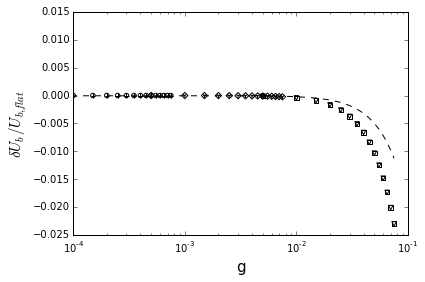

In [73]:
duBulk = 3./2.*uBulk - 1. 
plt.figure()
markers = np.array(['o','1','s', '+','D','v']).reshape((2,3))
for indr in [0,1]:
    for inda in range(3):
        gArr = aArr[inda]*epsArr
        plt.scatter(gArr, duBulk[indr,inda], marker = markers[indr,inda],color='black',facecolors='none')
gFullArr = np.arange(0., 1.0*0.077,0.005)
plt.plot(gFullArr,-2.*gFullArr**2,'k--')
plt.xscale("log")
plt.xlabel('g',fontsize=15); plt.ylabel('$\\delta U_b/U_{b,flat}$',fontsize=15)
plt.savefig(figureFolder+'uBulkRelLowAlpha.pdf', format='pdf')
plt.show()

/usr/lib/python3/dist-packages/matplotlib/collections.py:571: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


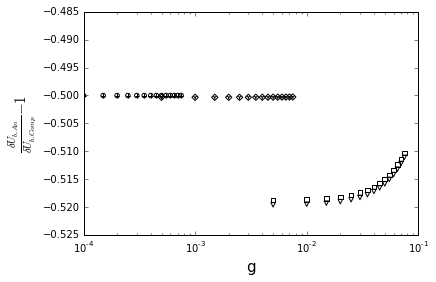

In [72]:
plt.figure()
markers = np.array(['o','1','s', '+','D','v']).reshape((2,3))
for indr in range(2):
    for inda in range(3):
        gArr = aArr[inda]*epsArr
        plt.scatter(gArr, (-2.*gArr**2)/duBulk[indr,inda] - 1., marker = markers[indr,inda],color='black',facecolors='none')
gFullArr = np.arange(0., 1.0*0.077,0.005)
plt.xscale("log")
plt.xlabel('g',fontsize=15); plt.ylabel('$\\frac{\\delta U_{b,An}}{\\delta U_{b,Comp}} -1$',fontsize=15)
plt.savefig(figureFolder+'uBulkRelDiffLowAlpha.pdf', format='pdf')
plt.show()

## Matrix free method

In [46]:
import scipy.optimize as spopt
from scipy.sparse.linalg import gmres, LinearOperator
flowDict = getDefaultDict()
flowDict.update({'K':0,'L':5,'M':0,'N':50,'Re':0.01,'alpha':20.,'beta':0.,'eps':0.03,'isPois':1})

J,F = makeSystem(flowDict=flowDict,resNorm=False)


/home/sabarish/Dropbox/gitwork/python3/flowFieldV2/laminar.py:459: UserWarning: pressure field not supplied, assigning zero pressure for computing residual
  warn('pressure field not supplied, assigning zero pressure for computing residual')


In [47]:
start1 = time.time()
dx1 = np.linalg.lstsq(J,-F)
time.time()-start1

14.696339130401611

In [48]:
Jfun = lambda xArr: np.dot(J,xArr)
Jop = LinearOperator(matvec=Jfun,shape=(F.size,F.size),dtype=np.complex)
x0 = dict2ff(updateDict(flowDict,{'nd':3}))
x0 = x0.appendField(x0.getScalar().zero())
start1 = time.time()
dx2 = gmres(Jop, -F,restart=F.size,tol=1.0e-12)
time.time()-start1

80.63113570213318

In [49]:
dx22 = dx2[0]; dx11 = dx1[0]

In [50]:
np.linalg.norm(Jop.matvec(dx22)+F), np.linalg.norm(np.dot(J,dx11)+F)

(1.5834097110348924e-08, 1.4343186035975573e-05)

In [43]:
dx2[1]

0

In [29]:
F.size

1100

In [54]:
gen = np.zeros((5,5))

In [55]:
gen[[1,2],[1,2]] = 1.
gen

array([[ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.]])